In [13]:
import numpy as np
import pandas as pd
from io import StringIO

In [21]:
csv_data = '''A,B,C,D
            1.0, 2.0, 3.0, 4.0
            5.0, 6.0,, 8.0
            0.0, 11.0, 12.0,'''
csv_data = unicode(csv_data)

In [22]:
df = pd.read_csv(StringIO(csv_data))

In [23]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [24]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [25]:
df.dropna(axis=0)  #deleting the rows that involve NaN value

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [26]:
df.dropna(axis=1)  #axis=1 delete the column with NaN value

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [27]:
df.dropna(thresh=4)   #thresh = int , int 만큼 NaN이 없는 줄이어야함.

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [28]:
#특정한 column에 NaN이 있는 경우 제거
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [30]:
from sklearn.preprocessing import Imputer

In [31]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # 중간값으로 채워넣기

In [32]:
imr = imr.fit(df)

In [33]:
imputed_data = imr.transform(df.values)

In [34]:
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [35]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [36]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                  ['red', 'L', 13.5, 'class2'],
                  ['blue', 'XL', 15.3, 'class1']], columns=['color', 'size', 'price', 'classLabel'])

In [37]:
df

,color,size,price,classLabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [38]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [39]:
inv_size_mapping={v: k for k,v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)    #1,2,3 to M,L,XL

In [40]:
df

,color,size,price,classLabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [41]:
df['size'] = df['size'].map(size_mapping)  #back to 1,2,3


In [42]:
df

,color,size,price,classLabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [43]:
#nominal, categorical feature

In [44]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [46]:
#data wine
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [47]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [48]:
df_wine.head(5)  #after class labe, each head is a feature. finding class label based on wine's features

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
print('Class label', np.unique(df_wine['Class label']))  #show that there're three types in class label

('Class label', array([1, 2, 3]))


In [50]:
#split test and training data. Training data is to train...obv... (to make model)
from sklearn.model_selection import train_test_split          #all features into X which starts from [1] index
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values  #class labels into y - which is in [0] index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #test size 30%, randome state =0 means random 

In [51]:
#each feature would have different range of values and units. 
#below is the process of normalizing 1- 1000 to 1- 10... 
#preprocessing in scikit-learn :: this part is minmax. 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

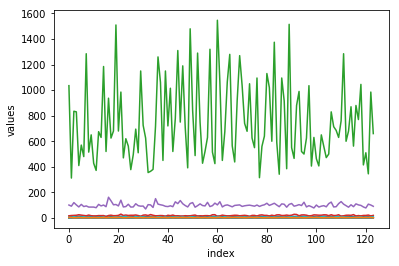

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_train)
plt.xlabel('index')
plt.ylabel('values')
plt.show()

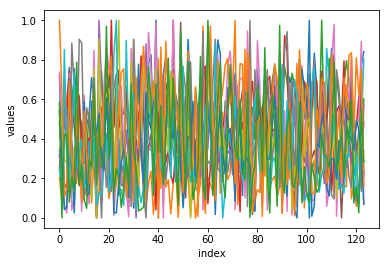

In [55]:
#normalize to prevent model to jump around like crazy
plt.plot(X_train_norm)
plt.xlabel('index')
plt.ylabel('values')
plt.show()

In [57]:
#logisitic regression comparison
#ensemble : combining models, trees /... /... etc. takes a lot. 4-5days to train. 
#start from regression model ,boosting, ensemble....
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1) # if there is Regularizer. C is a parameter, determine model size. 

In [58]:
# Before Data pre-processing(Scaling)
lr.fit(X_train, y_train)
print('Training accuracy: ', lr.score(X_train, y_train))
print('Test accuracy: ', lr.score(X_test, y_test))

('Training accuracy: ', 0.94354838709677424)
('Test accuracy: ', 0.92592592592592593)


In [ ]:
# After Data pre-processing(Scaling)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))